### Instituto Tecnologico de Costa Rica (ITCR)
### Sede Interuniversitaria de Alajuela
### Escuela de Computacion
### Curso: Inteligencia Artificial
### Estudiantes: 

 - Brandon Ledezma Fernández - 2018185574
 - Walter Morales Vásquez - 2018212846

### Profesora:
 
 - Maria Auxiliadora Mora

# Tarea Programada Número 5
---
#### Introducción:
<div style='text-align: justify;'> 
En este trabajo práctico se aplicarán conceptos básicos de aprendizaje automático
utilizando algoritmos no supervisados.
</div>
<div style='text-align: justify;'>
Los estudiantes deberán realizar dos ejercicios. El primero consiste en implementar de cero los algoritmos de K-Means y DBSCAN. El segundo ejercicio consiste en aplicar los algoritmos de clustering a datos del Organismo de Investigación Judicial (OIJ) integrados con indicadores socio-económicos generados por el Instituto Nacional de Estadística y Censos de Costa Rica (INEC) para hacer un estudio muy simplificado sobre la criminalidad en el país.
</div>
<div style='text-align: justify;'>
El objetivo del trabajo es poner en práctica el conocimiento adquirido durante el
curso sobre clustering por medio de ejercicios prácticos que permitan al estudiante
experimentar con un ejemplo de uso.
</div>

In [42]:
import math
import random

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 500

## Ejercicio 1. Implemente de cero los algoritmos K-Means y DBSCAN. 

1. (10 puntos) Implemente de cero el algoritmo de K-Means para vectores de atributos
de cualquier dimensión sin utilizar ninguna implementación de biblioteca. 

In [43]:
# Función para encontrar los valores mínimos y máximos de cada columna.
def encontrar_min_max(elementos):
    
    elem_min = [math.inf for i in range(len(elementos))]
    elem_max = [-math.inf for i in range(len(elementos))]
    
    for elem in elementos:
        for cols in range(len(elem)):
            if elem[cols] > elem_max[cols]:
                elem_max[cols] = elem[cols]
                
            if elem[cols] < elem_min[cols]:
                elem_min[cols] = elem[cols]
            
    return (elem_min, elem_max)

# Función para inicializar las medias, se utiliza la media de los datos.
def inicializar_medias(elementos, k, elem_min, elem_max):
    
    # Inicializamos la media de números aleatorios entre el 
    # valor mínimo y máximo de cada columna.
    cols = len(elementos[0]) # Número de atributos
    medias = [[0 for j in range(cols)] for i in range(k)]
    
    for media in medias:
        for i in range(len(media)):
            
            # Se asigna un valor random flotante entre el rango dado.
            media[i] = random.uniform(elem_min[i]+1, elem_max[i]-1);
    
    return medias
    
# Método para calcular la distancia euclidiana entre dos elementos.
def distancia_euclidiana(x, y):
    
    # Variable donde se almacenará el resultado.
    resultado = 0 
    
    for i in range(len(x)):
        # Raíz cuadrada de la suma.
        resultado += (x[i]-y[i])**2
        
    return resultado

# Función que clasifica a los elementos según que tan cerca se encuentran de los centroides (medias).
def clasificar(medias, elem):
    
    minimo = math.inf
    index = -1

    for i in range(len(medias)):
        
        # Busca la distancia entre el elemento y la media.
        dis = distancia_euclidiana(elem, medias[i])
        
        if minimo > dis:
            minimo = dis
            index = i
            
    return index
    
# Función utilizada para actualizar los valores de los centroides.
def actualizar_media(cantidad, medias, elem):
    
    for i in range(len(medias)):
        m = medias[i]
        m = (m*(cantidad-1)+elem[i])/float(cantidad)
        medias[i] = round(m, 4)
      
    return medias

# Función que implementa el algoritmo de K-medias.
def k_medias(k, elementos, epocas=100000):
    
    # Se encuentra el máximo y el mínimo de cada columna.
    elem_min, elem_max = encontrar_min_max(elementos)
    
    # Se inicializan las medias en valores aleatorios en un rango.
    medias = inicializar_medias(elementos, k, elem_min, elem_max)
    
    # Inicializamos los clusters, serán K grupos.
    cantidad_en_clusters= [0 for i in range(len(medias))]
    
    # Lista que indica a cúal cluster pertenece el elemento en un índice.
    pertenece = [0 for i in range(len(elementos))]
    
    # Se recorre por la cantidad de épocas.
    for e in range(epocas):
        
        # Si no hay cambio de una época a otra se termina de iterar.
        sin_cambio = True
        for i in range(len(elementos)):
            
            elem = elementos[i]
            
            # Se clasifica a un elemento en un cluster y se actualiza la media 
            # (centroide) correspondiente.
            index = clasificar(medias, elem)
            
            cantidad_en_clusters[index] += 1
            cantidad = cantidad_en_clusters[index]
            medias[index] = actualizar_media(cantidad, medias[index], elem)
            
            # Cambió un elemento
            if(elem != pertenece[i]):
                sin_cambio = False
  
            pertenece[i] = index
    
        if (sin_cambio):
            break
    
    return medias, pertenece

2. (15 puntos) Implemente de cero el algoritmo DBSCAN.

In [44]:
# Función utilizada para obtener los vecinos de un punto en el algoritmo de 
# DBSCAN,se encarga de calcular la distancia a todos los puntos y los almacena 
# si la distancia es menor al parámetro Épsilon.
#  épsilon: valor de la distancia máxima entre puntos.
#  actual: punto central del cual se va a calcular la distancia.
#  elementos: todos los puntos existentes en los datos.
#  visitados: lista con puntos no visitados.
#  retorna: lista de puntos con distancia menor a Épsilon.
def obtener_vecinos(epsilon, actual, elementos, visitados):
    
    respuesta = []
    
    for i in range(len(visitados)):
        
        # Si la distancia euclidiana es menor o igual que epsilon, se considera vecino.
        distancia = distancia_euclidiana(actual, elementos[i])

        if distancia <= epsilon:
            respuesta.append(i)
    
    return respuesta

# Función para obtener los puntos indices de los puntos no visitados entre
# los datos utilizados en el clúster.
#  visitados: lista de enteros para verificar el estado de un punto
#             -1:para visitado, 0: para no visitado y 2:para punto de ruido
#  retorna: lista con los indices de los nodos no visitados
def obtener_no_visitados(visitados):
    
    respuesta = []
    
    for i in range(len(visitados)):
        if not visitados[i]:
            respuesta.append(i)
        
    return respuesta
    
# Algoritmo utilizado para agrupar datos, para esto se basa de una cantidad máxima de elementos,
# por lo que se dice que se basa en agrupamiento en densidad. Se elige un punto de inicio (p) aleatorio
# posteriormente se buscan los vecinos cercanos a este, si la cantidad de vecinos es mayor al mínimo
# de puntos se estima como núcleo, si un punto no es alcanzable desde ningun otro punto es considerado
# ruido.
#  epsilon: valor de la distancia euclidiana máxima entre puntos del clúster.
#  min_puntos: cantidad mínima de puntos por clúster.
#  elementos: datos que van a ser clasificados.
#  retorna: tupla con: lista con los clusters creados 
#                            y lista de a que cluster pertenece cada elemento.
def dbscan(epsilon, min_puntos, elementos):
    
    # Inicialización de los clusters, en cada índice de esta lista se encontrarán los elementos
    # si pertenecen al cluster con igual número que el índice - 1.
    clusters = []
    
    # Lista que indica a cuál cluster pertenecen los elementos, si termina resultando con el
    # valor -1, significa que el elemento en ese indice es categorizado como ruido.
    pertenece = [-1 for i in range(len(elementos))]
    
    # Lista que indica a cuales elementos se han visitado.
    visitados = [0 for i in range(len(elementos))]
    
    random.seed(4321)
    
    # Mientras hayan elementos aún no tomados en cuenta para la formación de clusters...
    while visitados.count(0) != 0:
        
        # Se obtiene un punto no visitado para tomarlo en cuenta como punto de cluster.
        no_visitados = obtener_no_visitados(visitados)
        
        punto_cluster = random.choice(no_visitados)
        visitados[punto_cluster] = 1
        
        # Se obtienen sus vecinos para comprobar si cumple con el mínimo de puntos.
        vecinos = obtener_vecinos(epsilon, elementos[punto_cluster], elementos, visitados)
        
        if len(vecinos) < min_puntos:
            
            visitados[punto_cluster] = -1
            continue
        
        # Se indica que los vecinos pertenecen al cluster.
        clusters.append([elementos[punto_cluster]])
        pertenece[punto_cluster] = len(clusters) -1
        
        for vecino in vecinos:
            
            visitados[vecino] = 2
        
        # Por cada elemento en los vecinos...
        while len(vecinos) != 0:
            
            elem = vecinos.pop()
                
            # Se obtienen sus vecinos para comprobar si cumple con el mínimo de puntos.
            pertenece[elem] = len(clusters) -1
            clusters[-1].append(elementos[elem])
            
            vecinos_elem = obtener_vecinos(epsilon, elementos[elem], elementos, visitados)
            
            if len(vecinos_elem) < min_puntos:
                
                visitados[vecino] = 2
                continue
                
            # Si cumple con el mínimo de puntos se añaden sus vecinos.
            for vecino in vecinos_elem:
                
                if not visitados[vecino] and not vecino in vecinos and vecino != elem:
                    vecinos.append(vecino)
                    visitados[vecino] = 2
    
    return clusters, pertenece

3. (2 puntos) Pruebe ambos algoritmos con datos generados artificialmente.

In [45]:
# Función utilizada para generar datos de manera aleatoria.
#  cant_datos: número de elementos que se desea generar
#  cant_cols: cantidad de columnas presentes en los datos
#  maximo: valor máximo del rango entre los datos a generar
#  minimo: valor mínimo del rango entre los datos a generar
#  retorna: lista de los datos generados
def generar_datos(cant_datos, cant_cols, maximo, minimo):
    
    # se genera listas de listas con valores seleccionados aleatoriamente dentro de un rango
    resultado = [[random.uniform(minimo, maximo) for j in range(cant_cols)] for i in range(cant_datos)]
    
    return resultado

# parametro para la generación de datos
cant_datos = 100
cant_cols = 2
maximo = 20
minimo = 0

# se generan los datos
datos = generar_datos(cant_datos, cant_cols, maximo, minimo)

print(f"Muestra de los datos generados:\n{datos[:10]}")

Muestra de los datos generados:
[[12.82196288785747, 2.2695875026556744], [13.487913167834263, 17.08461525826177], [11.7305748243669, 9.729952706515357], [8.214754850094215, 4.632404208356644], [13.1384642336923, 16.576307182631457], [8.913526373546826, 3.4171105101956534], [0.13470934538889257, 10.6365177264916], [8.75792342934851, 14.990277268751823], [12.95968894105589, 19.701459644538307], [12.515647086128723, 4.216352188793076]]


In [46]:
k = 3 # cantidad de clusters por los que se agruparan los datos
epocas = 1000 # cantidad de epocas que se van a iterar los datos

# se utiliza el algoritmo de kmedias para agrupar los datos
medias, pertenece_kmedias = k_medias(k, datos, epocas)

print(f"Centros de los clusteres creados: {medias}")
print("Clasificación:", pertenece_kmedias)

Centros de los clusteres creados: [[13.7517, 15.2752], [4.4562, 11.7996], [13.7746, 4.4546]]
Clasificación: [2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2]


In [47]:
epsilon = 5 # distancia máxima entre los puntos de un clúster
min_puntos = 2 # puntos mínimos para generar un cluster 

# se útiliza el algoritmo de DBSCAN para agrupar los datos
clusters, pertenece_dbscan = dbscan(epsilon, min_puntos, datos)


print(f"Cantidad de clusters creados: {len(clusters)}\n")
print(f"Clasificacíon: {pertenece_dbscan}")
print(f"Clusters:\n {clusters[:1]}")

Cantidad de clusters creados: 8

Clasificacíon: [0, 5, 0, 1, 5, 1, -1, 3, 5, 0, 3, 0, 4, 3, 3, 0, 2, 3, 5, 5, 3, 5, 7, 2, 0, 0, 0, 3, 0, -1, 0, 0, 0, 0, 5, 3, 3, 0, 0, 0, 4, 0, 0, 0, -1, 2, 0, 0, 0, 5, 2, 4, 3, 6, 0, 5, 0, 0, 5, 4, 0, 5, 0, 4, 6, 7, 3, 2, 3, 3, 3, 3, 0, 2, 4, 3, 0, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0, 3, 0, 2, 7, 3, 0, 5, 0, 3, 0, 5, 4, 0]
Clusters:
 [[[17.211012072063596, 11.6686102442407], [17.79639822432348, 10.519019673302704], [18.934970618217402, 8.948803904894202], [19.160997725139563, 7.815202538433423], [19.722070221389203, 5.833171964492781], [17.94228051611023, 6.583226718817481], [17.35989059511846, 4.890169193445999], [18.266944730871, 3.3368247501378567], [18.341332757510614, 2.0193074898046026], [16.275383835232084, 1.3266095191338145], [15.655235314711117, 1.572917123100861], [13.757710788399226, 2.648225248732441], [12.374732523447525, 3.887683651420979], [13.48698776513508, 5.694936210142217], [13.628921910668478, 7.402568333548894], [11.51501715965325, 7.89

4. (3 puntos) Visualice ambos resultados. 

Visualización de los elementos según el algoritmo de K-medias con: 3 ks

Cantidad de clusters: 3


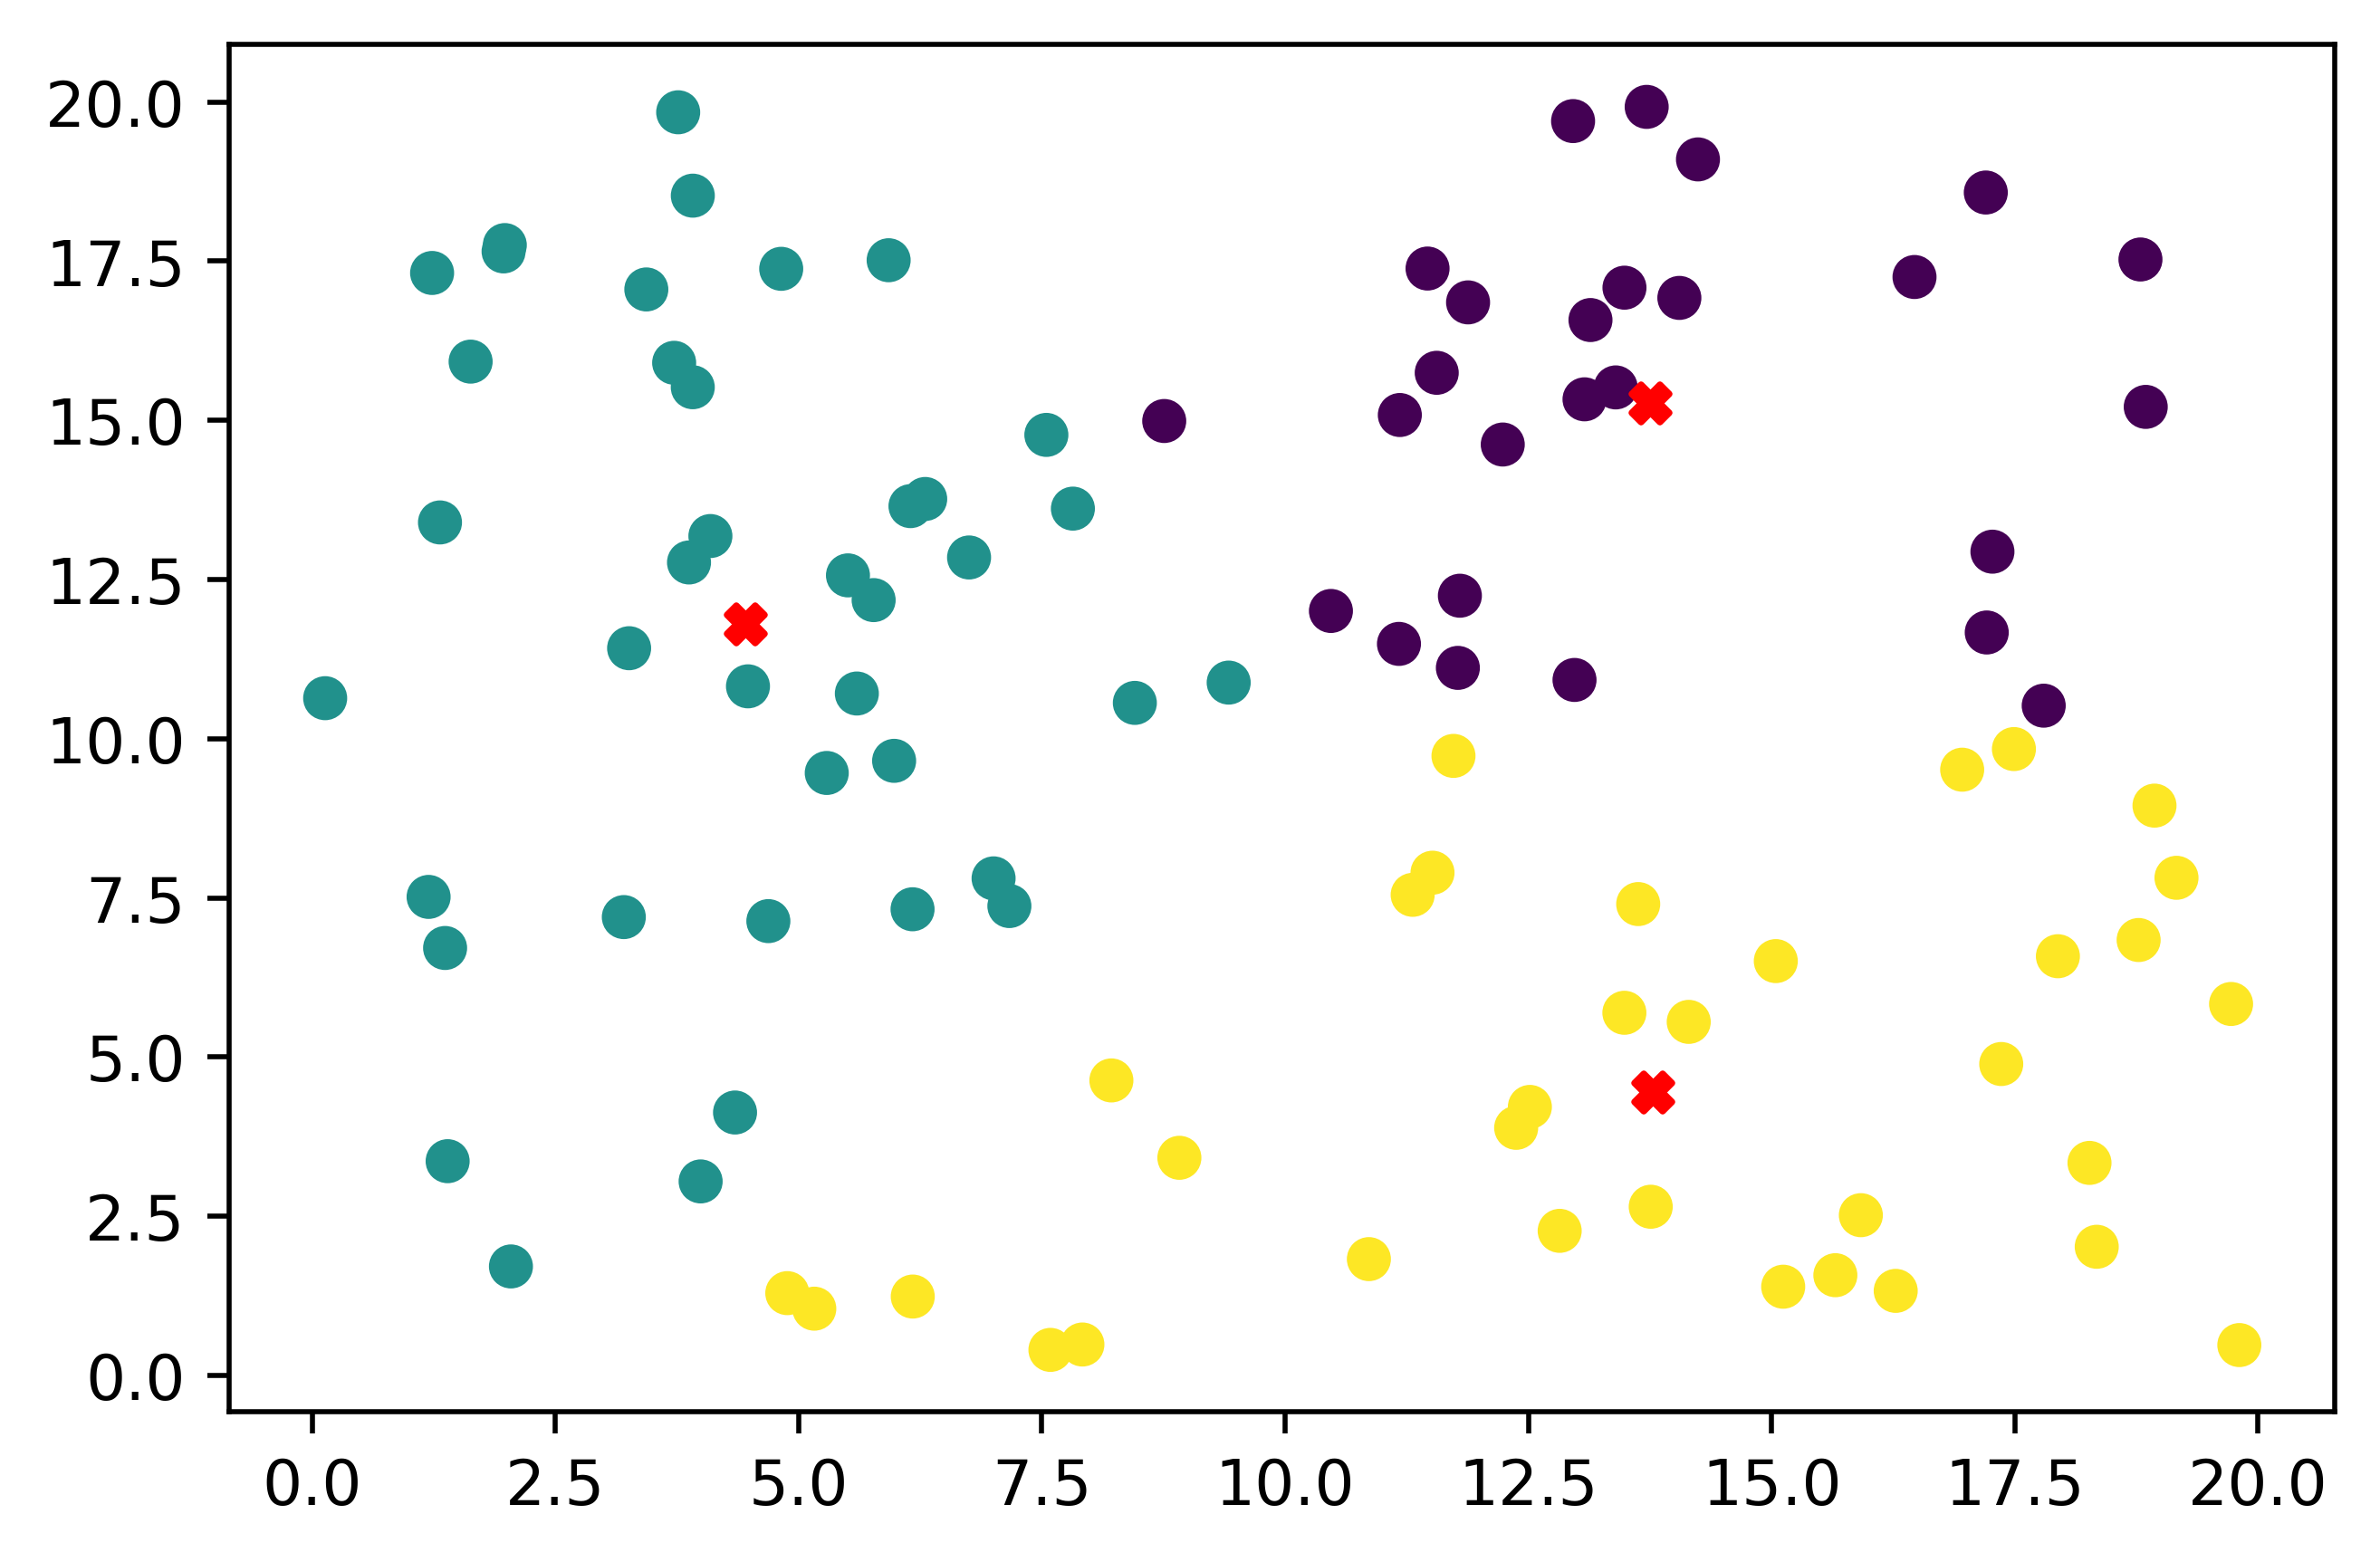

In [48]:
print(f"Visualización de los elementos según el algoritmo de K-medias con: {k} ks\n")
print(f"Cantidad de clusters: {len(set(pertenece_kmedias))}")

x = [elem[0] for elem in datos]
y = [elem[1] for elem in datos]

# Se obtienen los centroides de los clusters.
x_means = [elem[0] for elem in medias]
y_means = [elem[1] for elem in medias]

# Se grafican los grupos, además se grafican los centroides mediante una X roja.
plt.figure()
plt.title('')
plt.scatter(x, y, marker="o", c=pertenece_kmedias)
plt.scatter(x_means, y_means, marker="X", c="red")
plt.show()

Visualización de los elementos según el algoritmo de DBScan con epsilon: 5, 
y con un mínimo de puntos: 2

Cantidad de clusters: 9


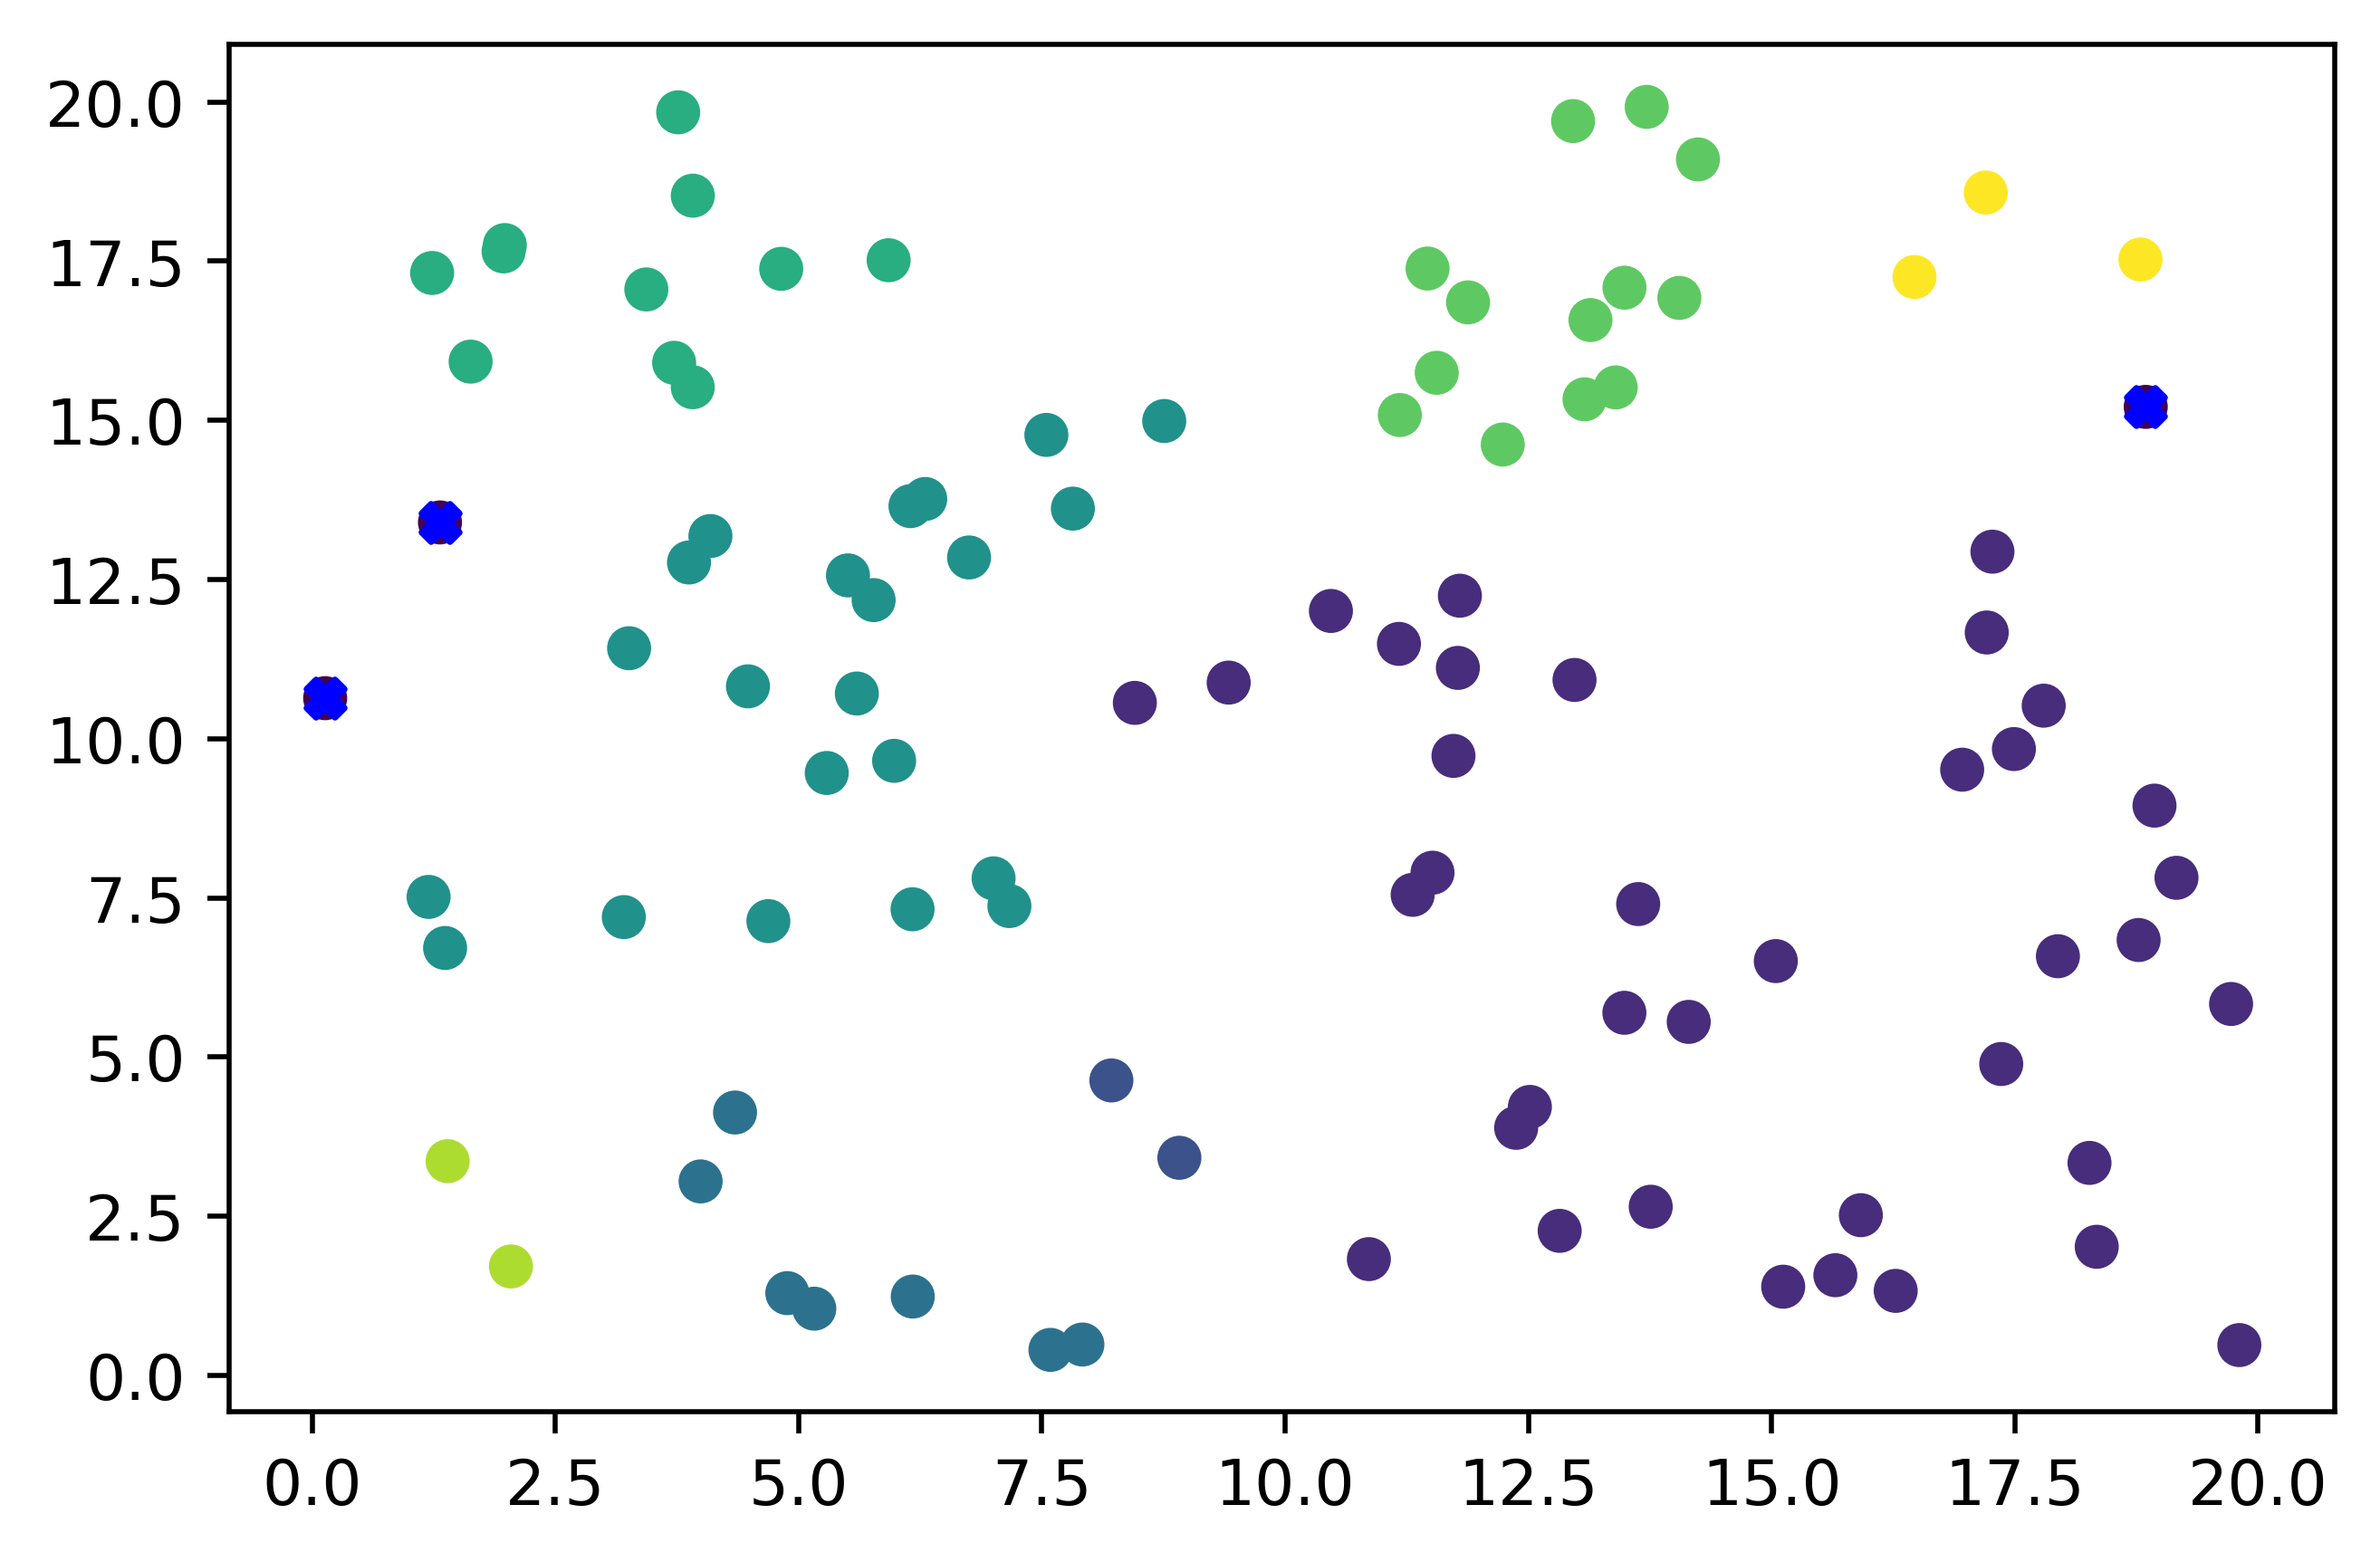

In [49]:
print(f"Visualización de los elementos según el algoritmo de DBScan con epsilon: {epsilon}, \ny con un mínimo de puntos: {min_puntos}\n")
print(f"Cantidad de clusters: {len(set(pertenece_dbscan))}")

no_x = []
no_y = []

# Se obtienen los elementos clasificados como ruido.
for i in range(len(pertenece_dbscan)):
    if pertenece_dbscan[i] == -1:
        no_x.append(x[i])
        no_y.append(y[i])

# Se grafican los grupos, además se grafican los elementos ruido mediante una X azul.
plt.figure()
plt.title('')
plt.scatter(x, y, marker="o", c=pertenece_dbscan)
plt.scatter(no_x, no_y, marker="X", c="blue")
plt.show()

## Ejercicio 2. Aplicación de los algoritmos de clustering implementados para caracterizar la criminalidad en Costa Rica a partir de datos del OIJ y el INEC.
---
<div style='text-align: justify;'>
Objetivo: El objetivo del presente ejercicio es utilizar datos de criminalidad en Costa Rica
combinados con datos socio-económicos asociados a distritos para demostrar cuán
efectivos y precisos pueden ser los algoritmos de clustering en la definición de perfiles de
criminalidad por distrito a nivel nacional. El presente ejercicio utilizará datos numéricos
únicamente para tipificar de forma muy simplificada (utilizando dos características) los
distritos por cantidad de delitos y tasa de desempleo abierto.
</div>

1. (4 puntos) Baje los siguientes conjuntos de datos, publicados por las siguientes
instituciones nacionales, intégrelos por medio del nombre del distrito y
preprocéselos para el ejercicio (documente muy bien todo el proceso).
Para ambos conjuntos de datos baje los datos para todas las provincias, cantones
y distritos y asegúrese que los datos están limpios antes de hacer el join por distrito
para asegurarse que la mínima cantidad de datos no es tomada en cuenta. Es
decir deben verificar que en ambos conjuntos de datos los distritos estén
escritos de la misma forma.

Los conjuntos de datos:

 a) El OIJ publica datos sobre criminalidad en Costa Rica que tienen como
fuente las denuncias interpuestas directamente ante esta entidad nacional.
Los datos recopilados por el OIJ están disponibles por provincia, cantón o
distrito (deben ser bajados como hoja electrónica para contar con el dato de
distrito porque en otros formatos tienen errores). Los datos están disponibles
en [Organismo de Investigación Judicial (2018). Estadísticas poiciales. Recuperado de
https://sitiooij.poder-judicial.go.cr/index.php/apertura/transparencia/estadisticas-policiales ]. 

El conjunto de datos de criminalidad del OIJ posee las siguientes columnas:

* Delito:Tipo de Delito
* SubDelito: Tipo de SubDelito
* Fecha: Fecha del Hecho
* Hora: Rango de 3 horas del Hecho
* Victima: Descripción de la Víctima
* SubVictima: Descripción de la SubVíctima
* Edad: Grupo de Edad que pertenece la Víctima
* Genero: Género de la Víctima
* Nacionalidad: Nacionalidad de la Víctima
* Provincia: Provincia del Lugar del Hecho
* Canton: Cantón del Lugar del Hecho
* Distrito: Distrito del Lugar del Hecho

In [15]:
# se cargan los datos de criminalidad obtenidos del OIJ
criminalidad_dataset = pd.read_csv('./data/Estadisticas.csv', delimiter=',')

# se eliminan las filas que tengan datos nulos
criminalidad_dataset = criminalidad_dataset[criminalidad_dataset["Distrito"].notnull()]

# se eliminan caracteres especiales y se pasa a mínuscula los datos
criminalidad_dataset["Distrito"] = criminalidad_dataset["Distrito"].apply(lambda x: x.strip().lower())
criminalidad_dataset["Canton"] = criminalidad_dataset["Canton"].apply(lambda x: x.strip().lower())

# se genera una nueva columna con los datos de Canton y Distrito para 
# poder ordenar los datos correctamente, ya que si se comparan los datos
# unicamente por distrito, hay cantones con distritos con mismo nombres.
criminalidad_dataset["CantonDistrito"] = criminalidad_dataset["Canton"] + "," + criminalidad_dataset["Distrito"]

criminalidad_dataset

,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton,Distrito,CantonDistrito
0,DELITOS CONTRA LA FAMILIA,INCUMPLIMIENTO DE DEBERES FAMILIARES,2020-09-19,00:00:00 - 02:59:59,PERSONA,MENOR DE EDAD,Menor de edad,Menor de edad,COSTA RICA,GUANACASTE,abangares,sierra,"abangares,sierra"
1,DELITOS CONTRA LA FAMILIA,SUSTRACCION DE PERSONA MENOR O INCAPAZ Y CUIDO...,2021-03-08,12:00:00 - 14:59:59,PERSONA,MENOR DE EDAD,Menor de edad,Menor de edad,NICARAGUA,GUANACASTE,abangares,las juntas,"abangares,las juntas"
2,DELITOS CONTRA LA FAMILIA,VIOLENCIA DOMESTICA,2020-09-26,00:00:00 - 02:59:59,PERSONA,OTRO O INDETERMINADO,Desconocido,Desconocido,Desconocido,GUANACASTE,abangares,las juntas,"abangares,las juntas"
3,DELITOS CONTRA LA FAMILIA,INCUMPLIMIENTO DE DEBERES FAMILIARES,2020-12-05,21:00:00 - 23:59:59,PERSONA,MENOR DE EDAD,Menor de edad,Menor de edad,COSTA RICA,GUANACASTE,abangares,las juntas,"abangares,las juntas"
4,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,"INFRACCION A LEY DE REGISTRO, SECUESTRO Y EXAM...",2021-05-18,09:00:00 - 11:59:59,PERSONA,USUARIO SERVICIO PUBLICO/PRIVADO,Mayor de edad,Mayor de edad,COSTA RICA,GUANACASTE,abangares,sierra,"abangares,sierra"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77192,DELITOS CONTRA LA PROPIEDAD,ROBO,2021-03-20,06:00:00 - 08:59:59,VIVIENDA,NO APLICA,Mayor de edad,Mayor de edad,COSTA RICA,ALAJUELA,zarcero,guadalupe,"zarcero,guadalupe"
77193,DELITOS CONTRA LA PROPIEDAD,ROBO,2021-03-19,18:00:00 - 20:59:59,VEHICULO,RURAL 4X4,Mayor de edad,Mayor de edad,COSTA RICA,ALAJUELA,zarcero,laguna,"zarcero,laguna"
77194,DELITOS SEXUALES,"VIOLACION, ESTUPRO Y ABUSO DESHONESTO",2020-09-13,00:00:00 - 02:59:59,PERSONA,MENOR DE EDAD,Menor de edad,Menor de edad,NICARAGUA,ALAJUELA,zarcero,tapezco,"zarcero,tapezco"
77195,ESTAFAS Y OTRAS DEFRAUDACIONES,ESTAFA,2020-09-08,00:00:00 - 02:59:59,PERSONA,CLIENTE BANCARIO,Adulto Mayor,Adulto Mayor,COSTA RICA,ALAJUELA,zarcero,laguna,"zarcero,laguna"


 b) El INEC es la institución encargada a nivel nacional de la generación y
divulgación de datos estadísticos obtenidos por medio de censos, encuestas
y otros estudios sobre demografía, economía y otros. Al igual que en el OIJ
los datos están disponibles por distrito. Los datos a utilizar, fueron
generados por el INEC como resultado del censo realizado en el país en el
año 2011. Los datos están disponibles en [ Instituto Nacional de Estadísticas y Censos (2011). Censo 2011: Indicadores
económicos, según provincia, cantón y distrito. Recuperado de
http://inec.cr/documento/censo-2011-indicadores-economicos-segun-provincia-canton-ydistrito ]. 

El conjunto de datos posee las siguientes columnas:
* Provincia, Cantón y Distrito
* Población de 15 años y más
* Tasa neta de participación
* Tasa de ocupación
* Tasa de desempleo abierto
* Porcentaje de poblacion economicamente inactiva
* Relación de depedencia económica

In [16]:
# se cargan los datos obtenidos de INEC, fue necesario modificar los datos para
# crear una columna de distrito, canton y provincia.
empleo_dataset = pd.read_csv('./data/reempleocenso2011-22.csv', delimiter=',')

# se eliminan los valores nulos
empleo_dataset = empleo_dataset[empleo_dataset["Distrito"].notnull()]
empleo_dataset = empleo_dataset[empleo_dataset["Tasa_desempleo_abierto"] != "-"]

# se eleminan caracteres especiales de los datos y se pasan a mínuscula
empleo_dataset["Distrito"] = empleo_dataset["Distrito"].apply(lambda x: x.strip().lower())
empleo_dataset["Canton"] = empleo_dataset["Canton"].apply(lambda x: x.strip().lower())

# se pasan los datos de string a flotante
empleo_dataset["Tasa_desempleo_abierto"] = empleo_dataset["Tasa_desempleo_abierto"].apply(lambda x: float(x))

# se normalizan los datos usando el escalado estandar (Standard Scaler)
empleo_dataset["Tasa_desempleo_abierto"] = \
        (empleo_dataset["Tasa_desempleo_abierto"]-empleo_dataset["Tasa_desempleo_abierto"].mean())\
        /empleo_dataset["Tasa_desempleo_abierto"].std()

# se genera una nueva columna con los datos de Canton y Distrito para 
# poder ordenar los datos correctamente, ya que si se comparan los datos
# unicamente por distrito, hay cantones con distritos con mismo nombres.
empleo_dataset["CantonDistrito"] = empleo_dataset["Canton"] + "," + empleo_dataset["Distrito"]

# se ordenan los datos alfabeticamente
empleo_dataset = empleo_dataset.sort_values("CantonDistrito")

# se actualizan los indices
empleo_dataset = empleo_dataset.reset_index(drop=True)

empleo_dataset

,Distrito,Canton,Provincia,Poblacion_15_anos_o_mas,Tasa_neta_participacion,Tasa_ocupacion,Tasa_desempleo_abierto,Porcentaje_economicamente_inactiva,Relacion_dependencia_economica,Porcentaje_ocupado_sector_primario,Porcentaje_ocupado_sector_secundario,Porcentaje_ocupado_sector_terciario,CantonDistrito
0,colorado,abangares,Guanacaste,3343,44.720311,41.788812,0.626200,55.279689,2.090970,34.287759,30.136006,35.576235,"abangares,colorado"
1,las juntas,abangares,Guanacaste,7046,47.005393,44.904911,0.609580,52.994607,1.862923,22.914033,15.044248,62.041719,"abangares,las juntas"
2,san juan,abangares,Guanacaste,1192,44.798658,42.617450,0.612958,55.201342,1.968165,46.259843,11.614173,42.125984,"abangares,san juan"
3,sierra,abangares,Guanacaste,1742,53.846154,52.123995,0.609791,46.153846,1.506397,42.400881,10.352423,47.246696,"abangares,sierra"
4,cangrejal,acosta,San Jose,1400,43.071429,42.285714,-0.908358,56.928571,2.109453,72.972973,3.378378,23.648649,"acosta,cangrejal"


2. (5 puntos) Seleccione las variables distrito, cantidad de delitos por distrito y tasa de
desempleo abierto por distrito. Debe realizar un conteo de los delitos por distrito. 

In [18]:
# se cuentan la cantidad de delitos por distritos
cantidad_delitos = criminalidad_dataset["CantonDistrito"].value_counts()

# se genera un nuevo dataframe con los datos obtenidos
cantidad_delitos = pd.DataFrame({'CantonDistrito':cantidad_delitos.index, 'Cantidad':cantidad_delitos.values})

# se estandarizan los datos de la cantidad de delitos
cantidad_delitos["Cantidad"] = (cantidad_delitos["Cantidad"]-cantidad_delitos["Cantidad"].mean())\
                                /cantidad_delitos["Cantidad"].std()

# se ordenan los datos alfabeticamente con los valores de la columna CantonDistrito
cantidad_delitos = cantidad_delitos.sort_values("CantonDistrito")

# se actualizan los indices
cantidad_delitos = cantidad_delitos.reset_index(drop=True)

cantidad_delitos

,CantonDistrito,Cantidad
0,"abangares,colorado",-0.366593
1,"abangares,las juntas",-0.078843
2,"abangares,san juan",-0.486792
3,"abangares,sierra",-0.435798
4,"acosta,cangrejal",-0.490434


In [19]:
# se cargan los datos de Tasa de Desempleo Abierto y Canton Distrito
tasa_desempleo = empleo_dataset[["CantonDistrito", "Tasa_desempleo_abierto"]]
tasa_desempleo

,CantonDistrito,Tasa_desempleo_abierto
0,"abangares,colorado",0.626200
1,"abangares,las juntas",0.609580
2,"abangares,san juan",0.612958
3,"abangares,sierra",0.609791
4,"acosta,cangrejal",-0.908358


In [20]:
# los largos de los datos son distintos, por lo que es necesario comparar que los datos de los 
# distritos de los dos conjuntos de datos conincidan, para eso se obtiene el más corto e itera
largo = min(len(cantidad_delitos), len(tasa_desempleo))

for i in range(largo):
    # se iteran los datos para comprobar que sean iguales, sino se imprimen
    if cantidad_delitos["CantonDistrito"][i] != tasa_desempleo["CantonDistrito"][i]:
        print("i:", cantidad_delitos["CantonDistrito"][i], "|", tasa_desempleo["CantonDistrito"][i])

i: acosta,desconocido | acosta,guaitil
i: acosta,guaitil | acosta,palmichal
i: acosta,palmichal | acosta,sabanillas
i: acosta,sabanillas | acosta,san ignacio
i: acosta,san ignacio | aguirre,naranjito
i: alajuela,alajuela | aguirre,quepos
i: alajuela,carrizal | aguirre,savegre
i: alajuela,desamparados | alajuela,alajuela
i: alajuela,desconocido | alajuela,carrizal
i: alajuela,guacima | alajuela,desamparados
i: alajuela,la garita | alajuela,garita
i: alajuela,rio segundo | alajuela,guacima
i: alajuela,sabanilla | alajuela,rio segundo
i: alajuela,san antonio | alajuela,sabanilla
i: alajuela,san isidro | alajuela,san antonio
i: alajuela,san jose | alajuela,san isidro
i: alajuela,san rafael | alajuela,san jose
i: alajuela,sarapiqui | alajuela,san rafael
i: alajuela,tambor | alajuela,sarapiqui
i: alajuela,turrucares | alajuela,tambor
i: alajuelita,alajuelita | alajuela,turrucares
i: alajuelita,concepcion | alajuelita,alajuelita
i: alajuelita,desconocido | alajuelita,concepcion
i: aserri,desc

In [21]:
# indices para recorrer los datos de los dos conjuntos de datos
i = 0
j = 0
# se almacenan los indicen que no coninciden para eliminarlos
lista1 = [] # indice de cantidad_delitos
lista2 = [] # indice de tasa_desempleo
while True:
    # mientras no se haya completado de recorrer los datos
    if i == len(cantidad_delitos) or j == len(tasa_desempleo):
        break
    # se verifican si son iguales
    if cantidad_delitos["CantonDistrito"][i] == tasa_desempleo["CantonDistrito"][j]:
        i += 1
        j += 1
    # si no se agrega el indice de elementos a eliminar en cantidad_delitos
    elif cantidad_delitos["CantonDistrito"][i] < tasa_desempleo["CantonDistrito"][j]:
        lista1.append(i)
        i += 1
    # o se agrega el indice de tasa_desempleo
    else:
        lista2.append(j)
        j += 1

# se eliminan los indicen que no eran iguales
cantidad_delitos = cantidad_delitos.drop(lista1)
tasa_desempleo = tasa_desempleo.drop(lista2)

# se actualizan los indices
tasa_desempleo = tasa_desempleo.reset_index(drop=True)
tasa_desempleo

,CantonDistrito,Tasa_desempleo_abierto
0,"abangares,colorado",0.626200
1,"abangares,las juntas",0.609580
2,"abangares,san juan",0.612958
3,"abangares,sierra",0.609791
4,"acosta,cangrejal",-0.908358
...,...,...
415,"zarcero,guadalupe",-0.219340
416,"zarcero,laguna",-0.223962
417,"zarcero,palmira",-0.215085
418,"zarcero,zapote",-0.213511


In [22]:
# se actualizan los indices
cantidad_delitos = cantidad_delitos.reset_index(drop=True)
cantidad_delitos

,CantonDistrito,Cantidad
0,"abangares,colorado",-0.366593
1,"abangares,las juntas",-0.078843
2,"abangares,san juan",-0.486792
3,"abangares,sierra",-0.435798
4,"acosta,cangrejal",-0.490434
...,...,...
415,"zarcero,guadalupe",-0.494077
416,"zarcero,laguna",-0.486792
417,"zarcero,palmira",-0.486792
418,"zarcero,zapote",-0.505004


In [23]:
# se verifíca que los datos sean iguales
largo = min(len(cantidad_delitos), len(tasa_desempleo))

flag = True
# se iteran los datos para comprobar que enten correctos
for i in range(largo):
    if cantidad_delitos["CantonDistrito"][i] != tasa_desempleo["CantonDistrito"][i]:
        flag = False
        print("i:", cantidad_delitos["CantonDistrito"][i], "|", tasa_desempleo["CantonDistrito"][i])

# se imprime el estado de los datos        
if flag:
    print("Los datos tienen los mismos distritos")
else:
    print("Los datos no tienen los mismos distritos")

Los datos tienen los mismos distritos


3. (5 puntos) Utilice el algoritmo K-Means implementado en el ejercicio 1 para
caracterizar los datos usando las variables cantidad de delitos por distrito y tasa de
desempleo abierto por distrito.

In [24]:
# se genera una lista de los datos de candidad de delitos y tasa de desempleo
elementos = list(zip(cantidad_delitos["Cantidad"], tasa_desempleo["Tasa_desempleo_abierto"]))
print("Muestra de los elementos generados:")
print(*elementos[:10], sep="\n")

(-0.36659257572770654, 0.6261995801310233)
(-0.07884293400167278, 0.6095800489777552)
(-0.48679179315756876, 0.6129578632492272)
(-0.43579818576308177, 0.609791154478513)
(-0.49043419368574637, -0.9083579150011156)
(-0.47950699210121345, -0.9156179125928584)
(-0.4321557852349041, -0.9145235884576658)
(-0.48679179315756876, -0.8915872337335453)
(-0.27553256252326547, -0.9242286245043739)
(4.612568946291131, -0.6078318075983882)


In [25]:
k_clusters = 3 # cantidad de clusters a crear
epocas_distritos = 1000 # cantidad de epocas que se calculan los clusters

# se llama al algoritmo de k-medias para la generación y clasificación de los clusters
medias_distritos, pertenece_kmedias_distritos = k_medias(k_clusters, elementos, epocas_distritos)

print(f"Centros de los clusteres creados: {medias_distritos}")
print("Clasificación:", pertenece_kmedias_distritos)

[[0.0027, -0.4987], [0.0671, 1.2669], [3.4543, -0.7277]]


4. (2 puntos) Utilice el método del codo para seleccionar el mejor K y vuelva a
ejecutar el algoritmo usando el K recomendado.

Número de K: 1
Número de K: 2
Número de K: 3
Número de K: 4
Número de K: 5
Número de K: 6
Número de K: 7
Número de K: 8
Número de K: 9


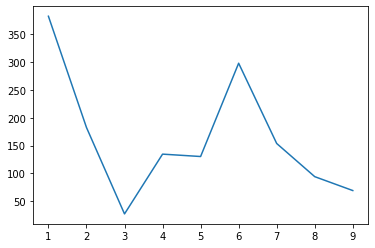

In [26]:
# Función que implementa al algoritmo del codo para identificar al mejor número de K en K-medias
# para un grupo determinado.
def metodo_codo(k_max, datos, epocas):
    
    respuesta = []
    # Se comprueba con cada uno de los posibles K en el rango.
    for k in range(1, k_max):
        
        print("Número de K:", k)
        medias, pertenece = k_medias(k, datos, epocas)
        
        # Se le realiza una sumatoria de la suma euclidiana de cada uno de los elementos del cluster 
        # con su centroide, entre más pequeña sea las distancias mejor evaluada será la ejecución.
        suma = 0
        for i in range(len(medias)):
            for j in pertenece:
                
                if i == pertenece[j]:
                    suma += distancia_euclidiana(medias[i], datos[j])
        
        respuesta.append(suma)
    return respuesta

# Se prueba hasta k = 10
k_max = 10
    
x = range(1, k_max)
y = metodo_codo(k_max, elementos, epocas_distritos)
        
# Se grafican las clases junto con la línea que los divide.
plt.figure()
plt.title('')
plt.plot(x, y)
plt.show()

In [27]:
# A partir de esto se concluye que el número ideal de clusters es de 3
k_clusters = 3
epocas_distritos = 1000

medias_distritos, pertenece_kmedias_distritos = k_medias(k_clusters, elementos, epocas_distritos)

print("Centroides de los clusters:")
print(medias_distritos)

Centroides de los clusters:
[[0.0452, 1.1229], [3.4543, -0.7275], [0.0209, -0.6775]]


5. (2 puntos) Investigue sobre la mejor forma de evaluar el algoritmo K-Means y
documente su investigación (e incluya en el cuaderno de Jupyter a presentar al
menos dos de los métodos de evaluación encontrados). (2 puntos) Aplique uno de
los métodos a la evaluación de los clusteres resultantes del ejercicio anterior

## Métodos de evaluación de K-Means
A continuación se presentan algunas de las metricas de evaluación más comunes del algoritmo de K-medias:

### Suma de Cuadrados Internos

---

<div style='text-align: justify;'> La suma de cuadrados internos (Sum of Squared Within) es una métrica del tipo interna para la validación de algortimos de agrupamiento, es decir, se basa en la evaluación de los grupos únicamente utilizando información de los datos utilizados y los clusters formados. </div>

<br/>

<div style='text-align: justify;'> Es utilizada para evaluar la cohesión de los grupos que fueron generados en el algoritmo de clustering (en este caso será utilizado para evaluar K-medias). Cuando se menciona que se evaluará la cohesión se refiere a que se premia que cada miembro del cluster se encuentre lo más cercano posible a los otros miembros del mismo cluster. En esta implementación, se validará que tan cerca se encuentra un elemento al comparar su distancia con el centroide del grupo (que actua como la media). La fórmula matemática que se seguirá es la siguiente:</div>

<p style="text-align: center;">$\normalsize{SSW = \sum_{i = 1}^{k}\sum_{x\epsilon C_{i}}^{} dist^{k}(m_i, x)}$</p>

<br/>

<div style='text-align: justify;'> Siendo k el número de clústeres, x un punto perteneciente al clúster $𝐶_i$ y $m_i$ el centroide del clúster 𝐶i. </div>

### Suma de Cuadrados en Medio

---

<div style='text-align: justify;'>La suma de cuadrados medios (SSB por sus siglas en ingles), es una métrica o medida de separación utilizada para medir la distancia existente entre los clústeres, esta métrica esta clasificada como una métrica interna ya que miden el clúster utilizando únicamente la información presente en los datos sin necesidad de información externa al algoritmo y resultado.</div>

<br/>

<div style='text-align: justify;'>Esta métrica usa el criterio de separación, el cual consiste en que los clústeres deben de estar altamente separados entre ellos, para lo que se tiene a utilizar distintos enfoque con el objetivo de poder medir la distancia entre los clúster ya sea con,distancia entre el miembro más cercano, distancia entre los miembros más distantes o bien la distancia entre los centroides. La formula matemática asociada a este método es la siguiente:</div>

<p style="text-align: center;">$SSE = \sum_{i=1}^{k}\sum_{x\varepsilon C_i}^{} dist_{2}(m_i, x))$</p>

<br/>

Siendo $k$ el número de clústeres, $x$ un punto del clúster $𝐶_i$ y mi elcentroide del clúster $𝐶_i$.

In [50]:
# Función que implementa el algoritmo de cuadrados internos para la evaluación del algoritmo K-medias.
def suma_de_cuadrados_internos(k, clusters, pertenece, elementos):
    
    # Variable que almacenará el resultado final.
    suma = 0 
    for index_cluster in range(k):
        
        for elem in range(len(pertenece)):
            
            # Si el elemento pertenece al cluster...
            if index_cluster == pertenece[elem]:
                # Se suma la distancia al cuadrado del elemento con el cluster.
                suma += distancia_euclidiana(clusters[index_cluster], elementos[elem])**2
        
    return suma

evaluacion = suma_de_cuadrados_internos(k_clusters, medias_distritos, pertenece_kmedias_distritos, elementos)
print("La evaluación de las agrupaciones (usando K-medias) con el algoritmo de suma de cuadrados internos es de:", evaluacion)

La evaluación de las agrupaciones (usando K-medias) con el algoritmo de suma de cuadrados internos es de: 1054.769621770662


6. (5 puntos) Utilice el algoritmo DBSCAN implementado en el ejercicio 1 para
caracterizar los datos usando las variables cantidad de delitos por distrito y tasa de
desempleo abierto por distrito.

In [54]:
# Se selecciona un epsilon de 5 y un mínimo de puntos de 3.
epsilon_distritos = 0.5
min_puntos_distritos = 2

clusters_distritos, pertenece_dbscan_distritos = dbscan(epsilon_distritos, min_puntos_distritos, elementos)

print("Primeros puntos de los clusters:") 
for elem in clusters_distritos:
    print(elem[0])

Primeros puntos de los clusters:
(-0.3083141672768643, -0.4586755324103775)
(2.161233390827577, -1.9580667324053114)
(5.319194648757594, 0.4383557830504731)
(2.022822170756827, 1.4923613836364653)
(-0.2609629604105549, 4.523788596647946)


In [55]:
clusters_dbscan = len(set(pertenece_dbscan_distritos))

medias_distritos_dbscan = []
for i in range(len(clusters_distritos)):
    
    media = [0]* len(clusters_distritos[0][0])
    
    for elem in clusters_distritos[i]:
        
        for j in range(len(elem)):
            media[j] += elem[j]
            
    for j in range(len(clusters_distritos[0][0])):
            media[j] /= len(clusters_distritos[i])
    
    medias_distritos_dbscan.append(media)

evaluacion = suma_de_cuadrados_internos(clusters_dbscan, medias_distritos_dbscan, pertenece_dbscan_distritos, elementos)
print("La evaluación de las agrupaciones (usando DBScan) con el algoritmo de suma de cuadrados internos es de:", evaluacion)

La evaluación de las agrupaciones (usando DBScan) con el algoritmo de suma de cuadrados internos es de: 1297.7891079026424


7. (5 puntos) Grafique los resultados de K-Means y DBSCAN.

Visualización de los elementos según el algoritmo de K-medias con: 3 ks

Cantidad de clusters: 3


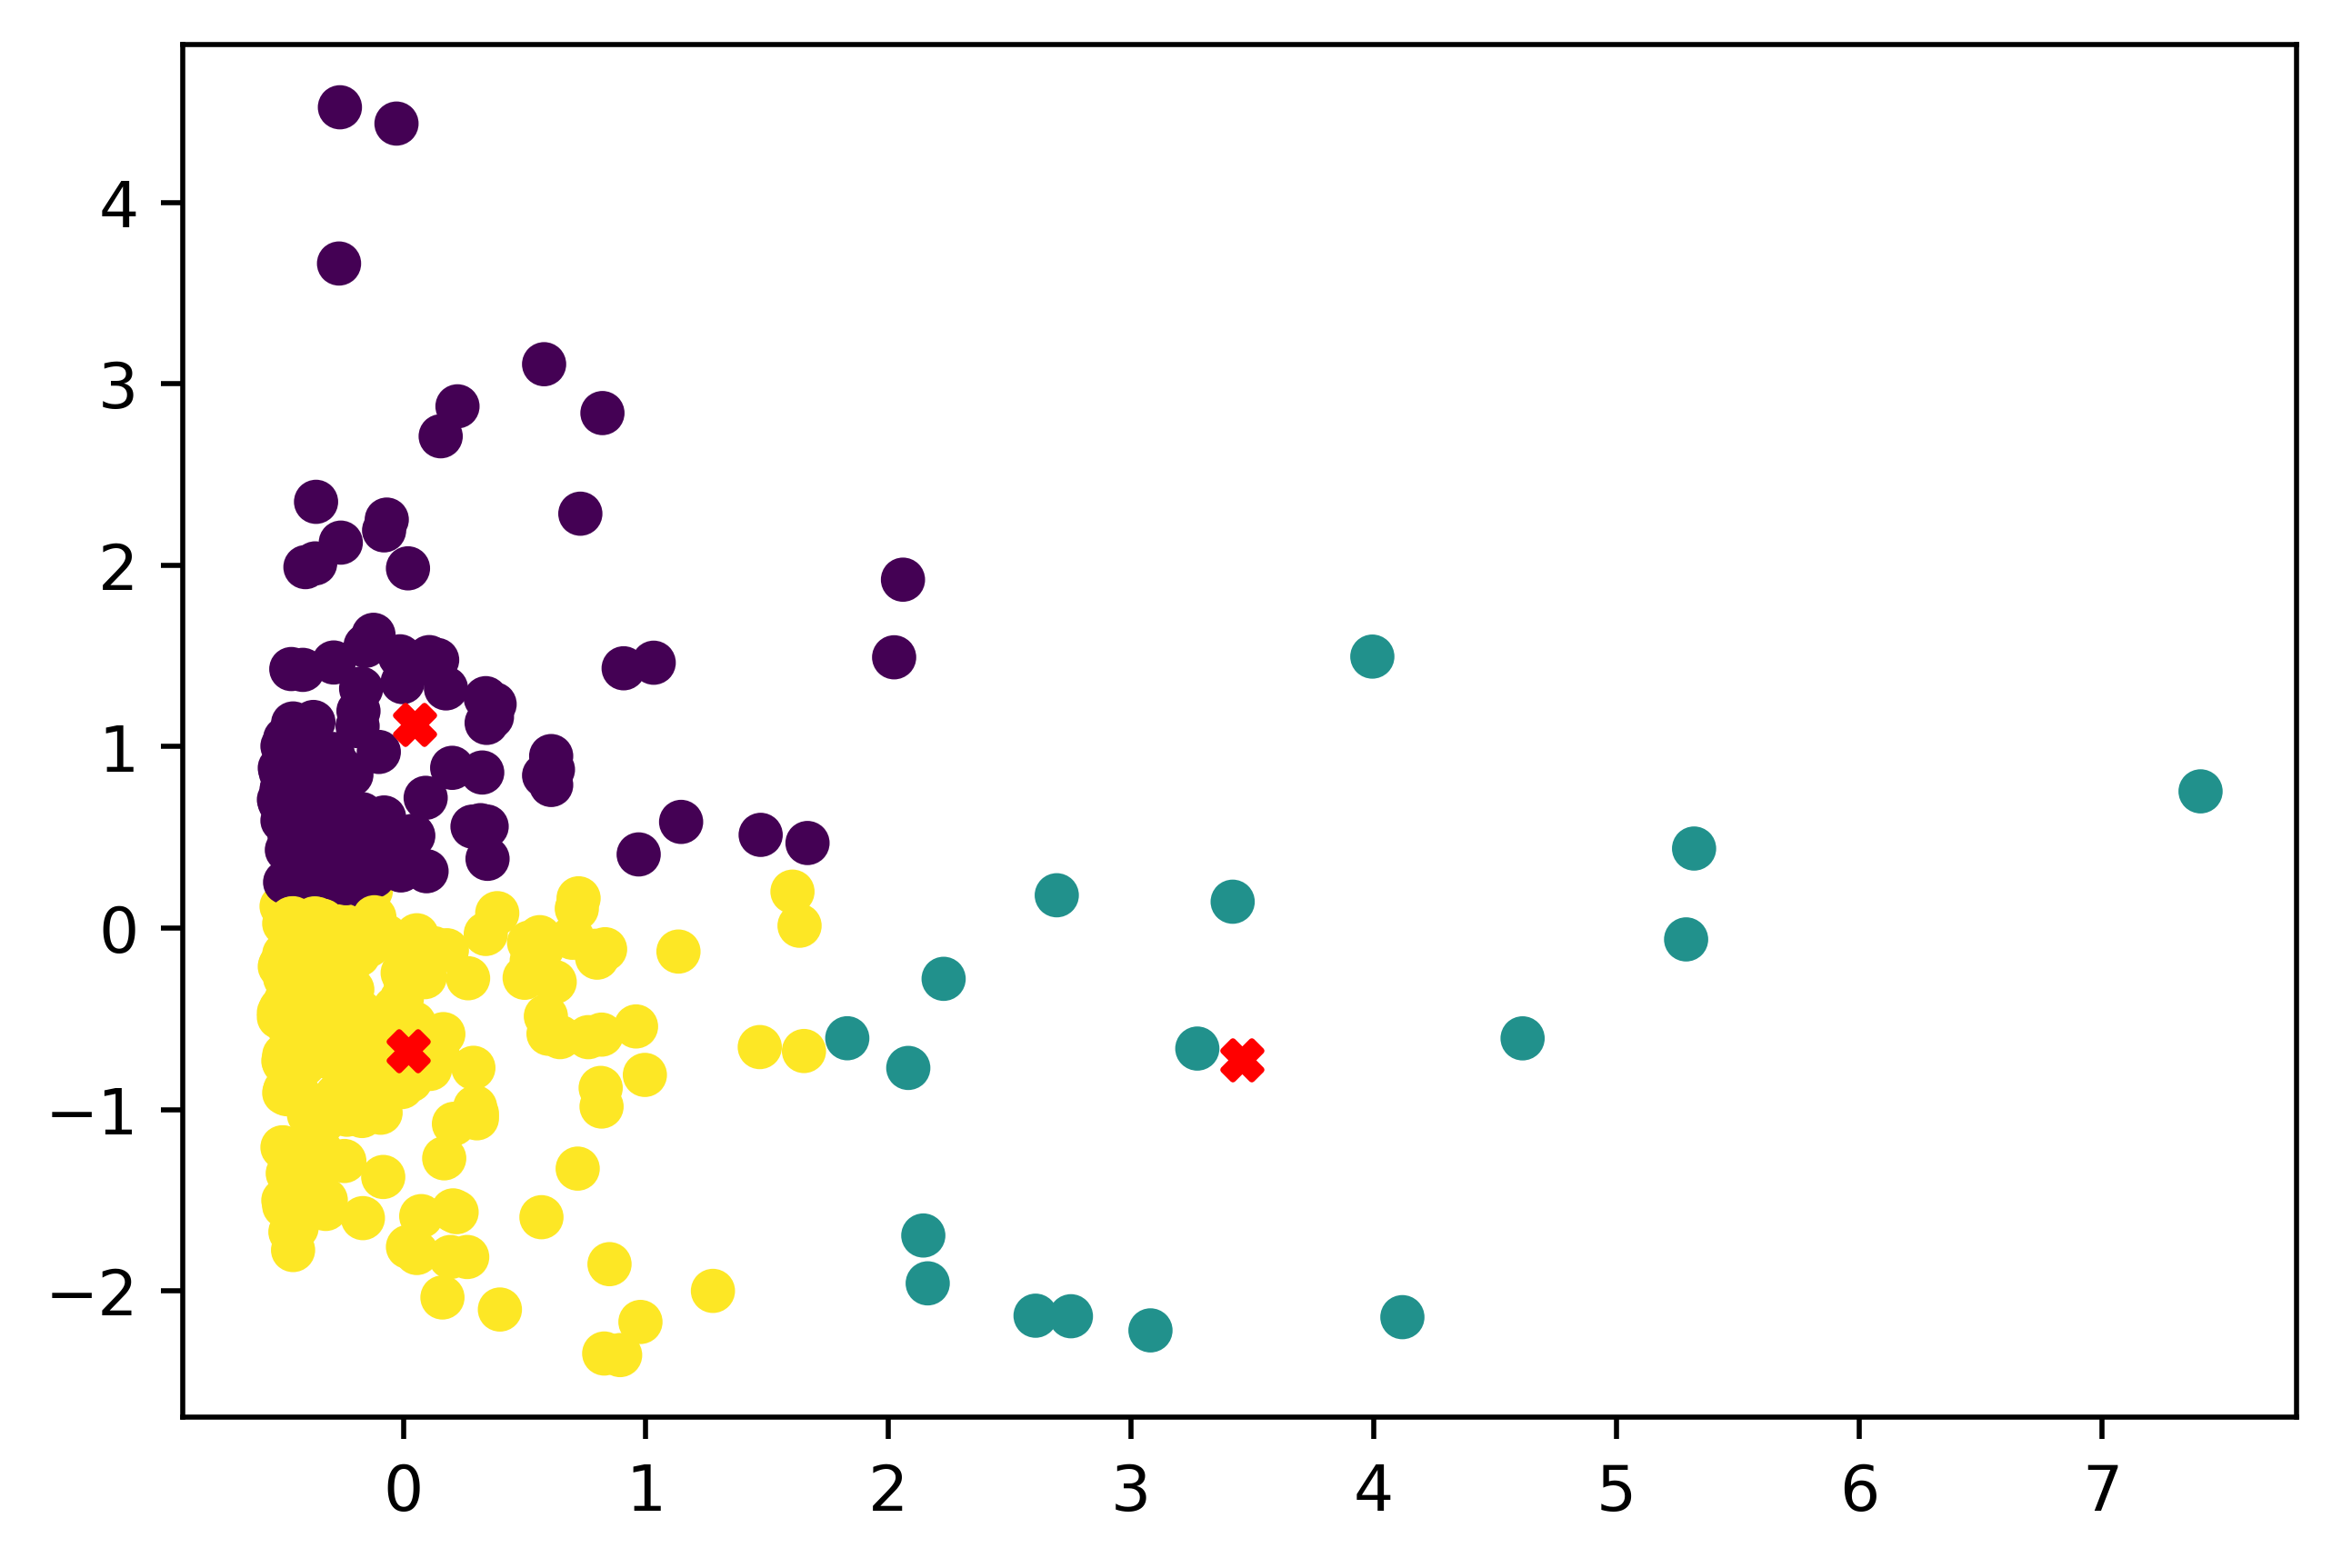

In [56]:
# Datos según el algoritmo de K-medias

print(f"Visualización de los elementos según el algoritmo de K-medias con: {k_clusters} ks\n")
print(f"Cantidad de clusters: {len(set(pertenece_kmedias_distritos))}")

x = [elem[0] for elem in elementos]
y = [elem[1] for elem in elementos]

# Se obtienen los centroides de los clusters.
x_means = [elem[0] for elem in medias_distritos]
y_means = [elem[1] for elem in medias_distritos]

# Se grafican los grupos, además se grafican los centroides mediante una X roja.
plt.figure()
plt.title('')
plt.scatter(x, y, marker="o", c=pertenece_kmedias_distritos)
plt.scatter(x_means, y_means, marker="X", c="red")
plt.show()

Visualización de los elementos según el algoritmo de DBScan con epsilon: 0.5, 
y con un mínimo de puntos: 2

Cantidad de clusters: 6


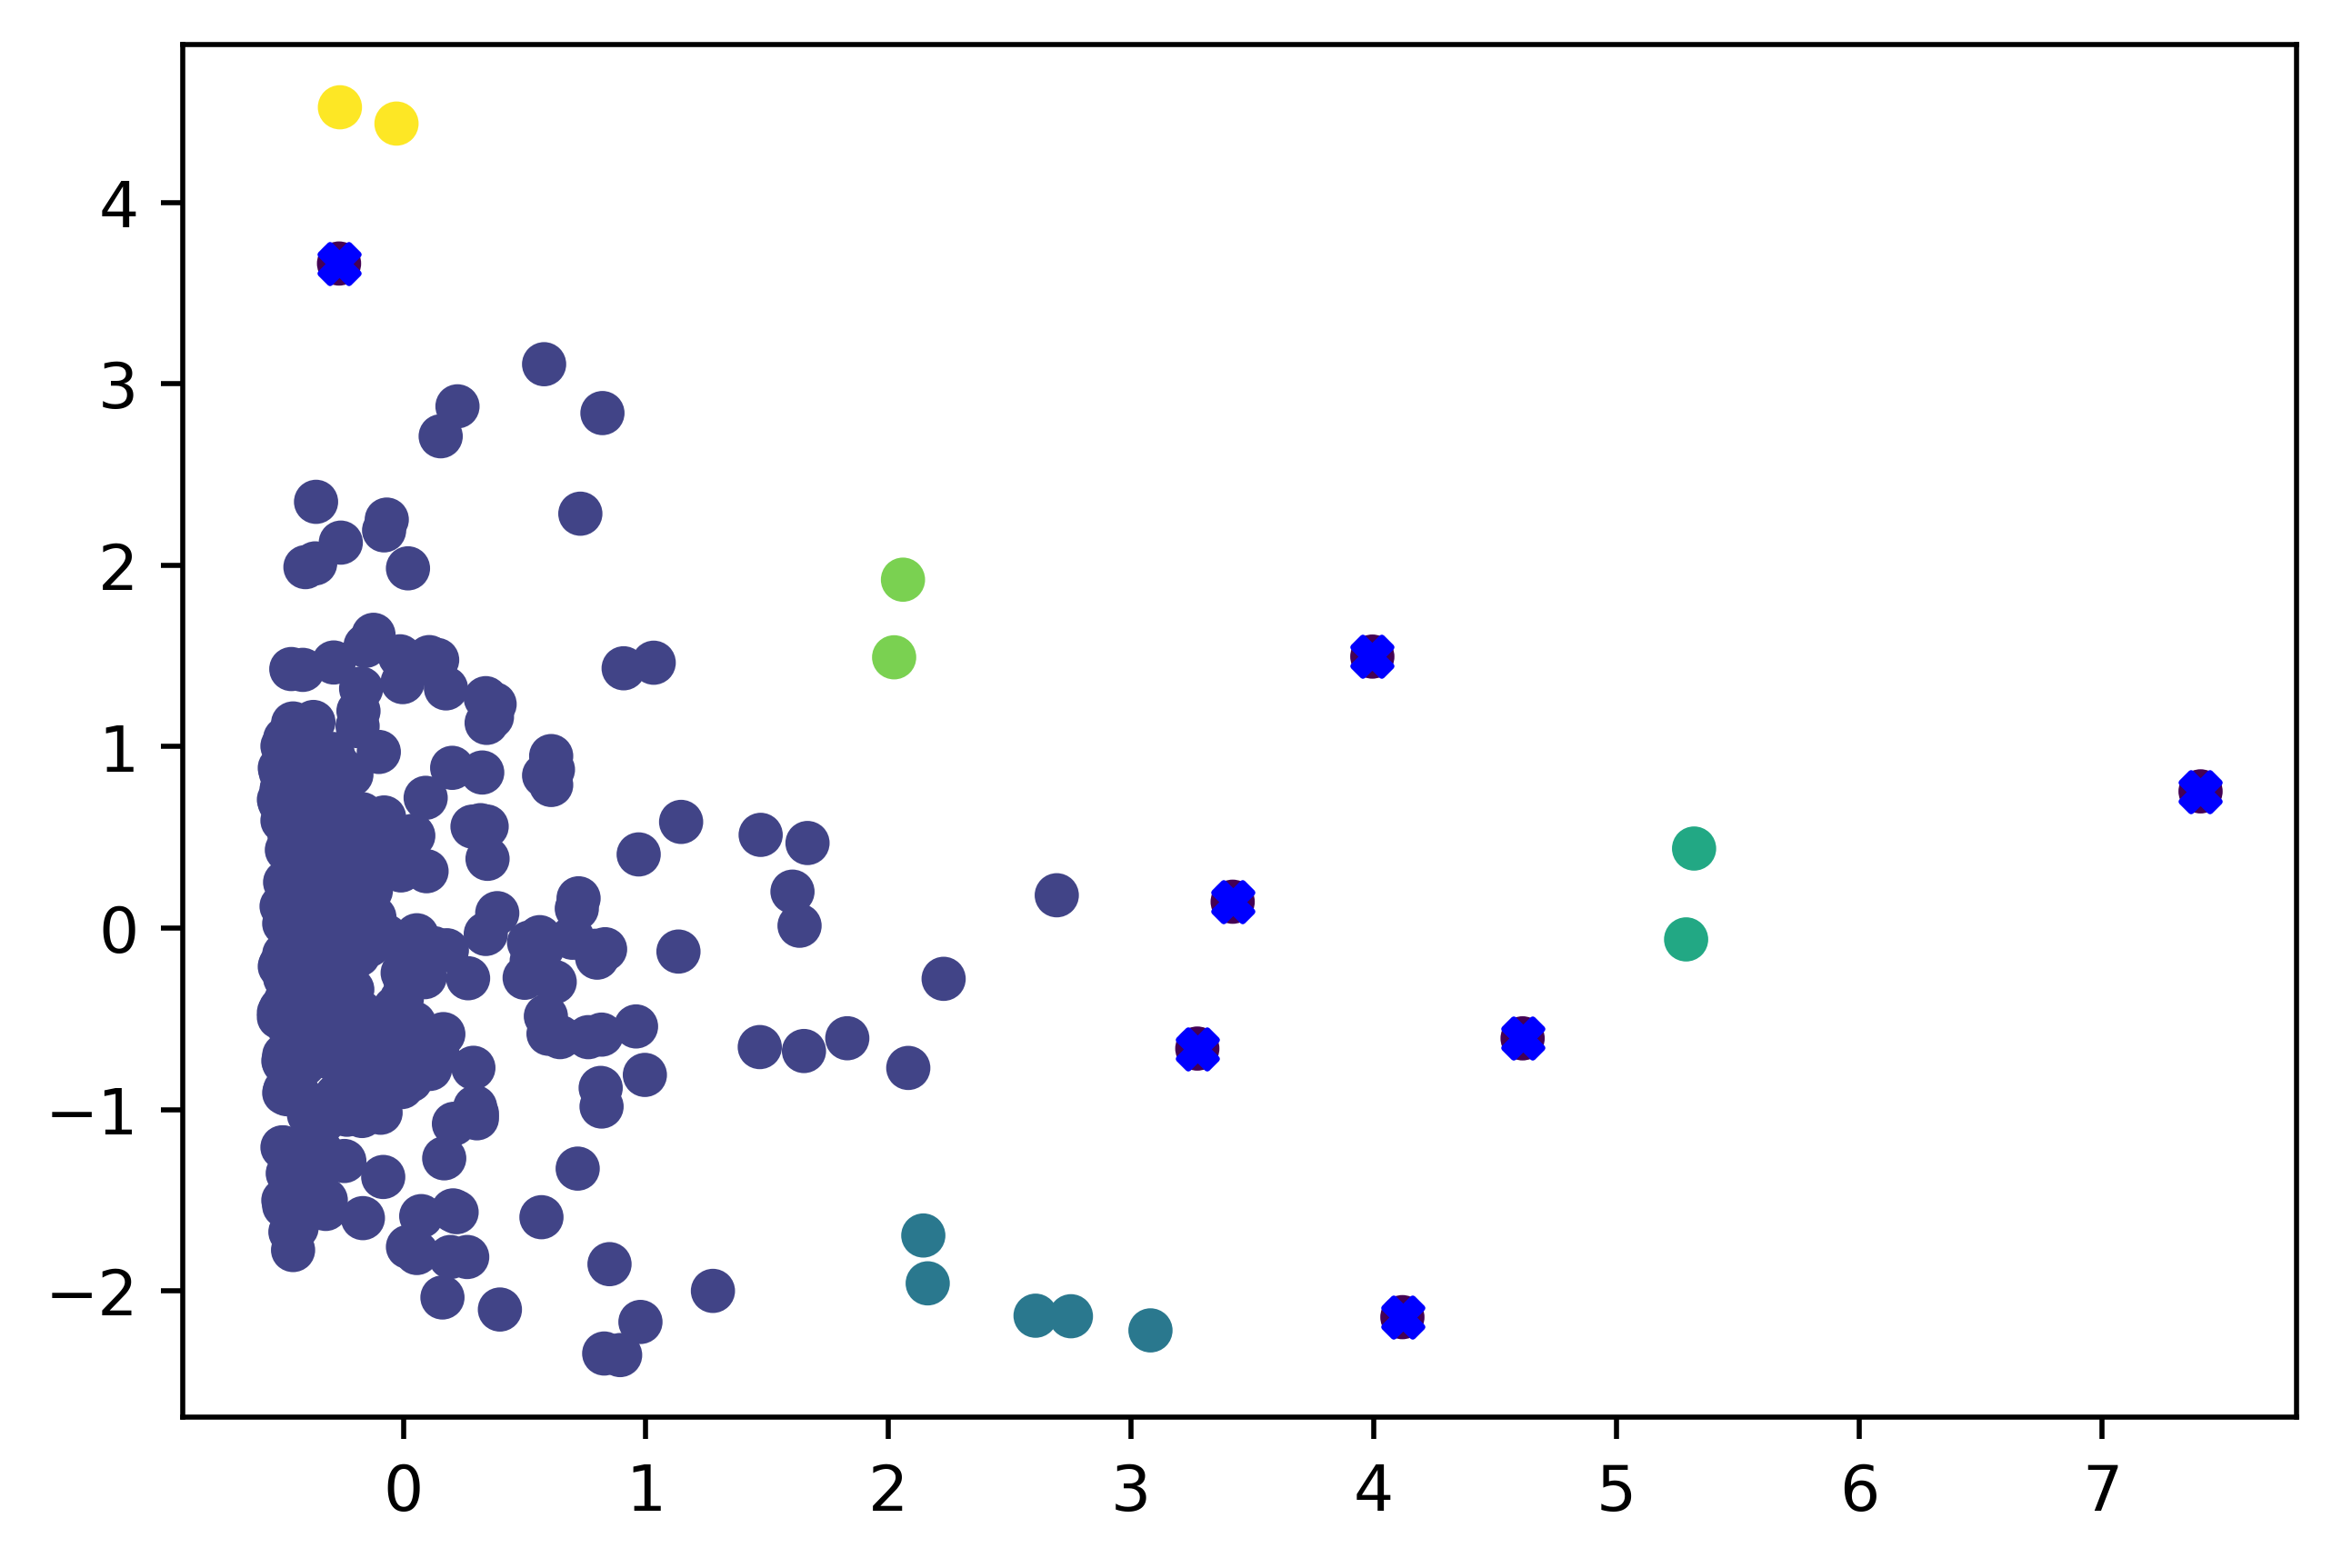

In [57]:
# Datos según el algoritmo de DBScan

print(f"Visualización de los elementos según el algoritmo de DBScan con epsilon: {epsilon_distritos}, \ny con un mínimo de puntos: {min_puntos_distritos}\n")
print(f"Cantidad de clusters: {len(set(pertenece_dbscan_distritos))}")

no_x = []
no_y = []

# Se obtienen los elementos clasificados como ruido.
for i in range(len(pertenece_dbscan_distritos)):
    if pertenece_dbscan_distritos[i] == -1:
        no_x.append(x[i])
        no_y.append(y[i])

# Se grafican los grupos, además se grafican los elementos ruido mediante una X azul.
plt.figure()
plt.title('')
plt.scatter(x, y, marker="o", c=pertenece_dbscan_distritos)
plt.scatter(no_x, no_y, marker="X", c="blue")
plt.show()

8. (2 puntos) Genere y documente sus conclusiones (incluya al menos cuatro
conclusiones importantes).

A continuación se presentan las conclusiones obtenidas de este ejercicio:
* <div style='text-align: justify;'>Para la realización del ejercicio fue necesario manipular los datos obtenidos de ambas organizaciones (OIJ e INEC), los datos originalmente presentaban varias diferencias en cuanto a nombre por ejemplo: en el cantón de Upala, el distrito de San José tiene otro posible nombre “Pizote” por lo que los datos diferían, se igual forma pasaba con algunos distritos del cantón de Cartago. En los datos obtenidos del INEC, la forma en que venía organizados los datos de los distritos, cantones y provincias era distinto, por lo que fue necesario crear las 3 columnas por separado. Otro problema encontrado fue la existencia de caracteres especiales, como el caso de acentos o la letra “ñ”, las cuales presentaban problemas al cargarlas con pandas por lo que fue necesario remplazarlas. Otro aspecto fueron las cifras numéricas diferían, en algunos cantones, o la cantidad de incidentes registrados por el OIJ era muy superior, o bien en el caso de la tasa de desempleo eran valores variados, por lo que se decidió por normalizar los datos con el objetivo de que no existieran grandes diferencias entre los datos, para esto se utilizo la métrica de escalado estándar. Finalmente, se tuvo la precaución de que los datos presentes en los dos conjuntos coincidieran, el utilizar unicamente los distritos no era una buena opción, ya que hay cantones que comparten nombre de distrito por lo que fue necesario realizar la verificación con distritos y cantones (que los nombre de los cantones y distritos fueran iguales) para evitar problemas de conteos erróneos u otros inconvenientes adicionales.</div>

</br>

* <div style='text-align: justify;'>El algoritmo de K-means tiene sus ventajas, el algoritmo suele ser sencillo de elaborar y rápido, aunque sea necesario indicar el valor de la cantidad de clústeres, lo que puede afectar en el resultado final ya que se este valor depende la creación de los centroides. Además que no converge a un mínimo global, sino local. Este tiene varias formas para ser evaluado, sin embargo el método del codo suele ser una excelente métrica con el fin de medir el imparto del k y elegir el mejor, en nuestro caso el comportamiento es un poco extraño, ya que este tiene altibajos los cuales pueden ser resultado de la normalización utilizada  o bien puede ser causa de las anomalías en cuanto a diferencias numéricas se refiere, una solución puede ser eliminar esos datos antes de normalizar los datos.</div>

</br>

 - <div style='text-align: justify;'> El algoritmo de DBScan, aplicado a los datos sobre la criminalidad y la tasa de desempleo en los distritos del país, nos permite observar las agrupaciones que se forman entre los datos con valores similares, las zonas de extrema densidad de datos semejantes y nos brinda una mejor visualización de los datos que se salen de lo que se considerá común con respecto a los demás elementos. Además, cabe destacar que este algoritmo no sufre tanto al trabajar con agrupaciones de datos no esféricas (como en el caso de K-medias), por lo que es una excelente opción en la mayoría de problemas sobre clasificación de elementos.</div>

</br>

 - <div style='text-align: justify;'> Gracias a las diversas métricas de evaluación, podemos comprobar el rendimiento de nuestros algoritmos con respecto a otras implementaciones, lo que nos ayuda a comprobar el buen funcionamiento de nuestro código, si deberíamos cambiar de algoritmo de agrupamiento o si deberíamos reajustar los parámetros empleados en la ejecución de las funciones de clustering. Cabe destacar la importancia del conocimiento sobre las variadas métricas de evaluación, puesto que cada una se adapta mejor con respecto al objetivo final de la investigación.</div>